In [20]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import rich
print = rich.print
print("OpenCV version:", cv2.__version__)
print("Numpy version:", np.__version__)

OpenCV version: 4.8.1

Numpy version: 1.26.0

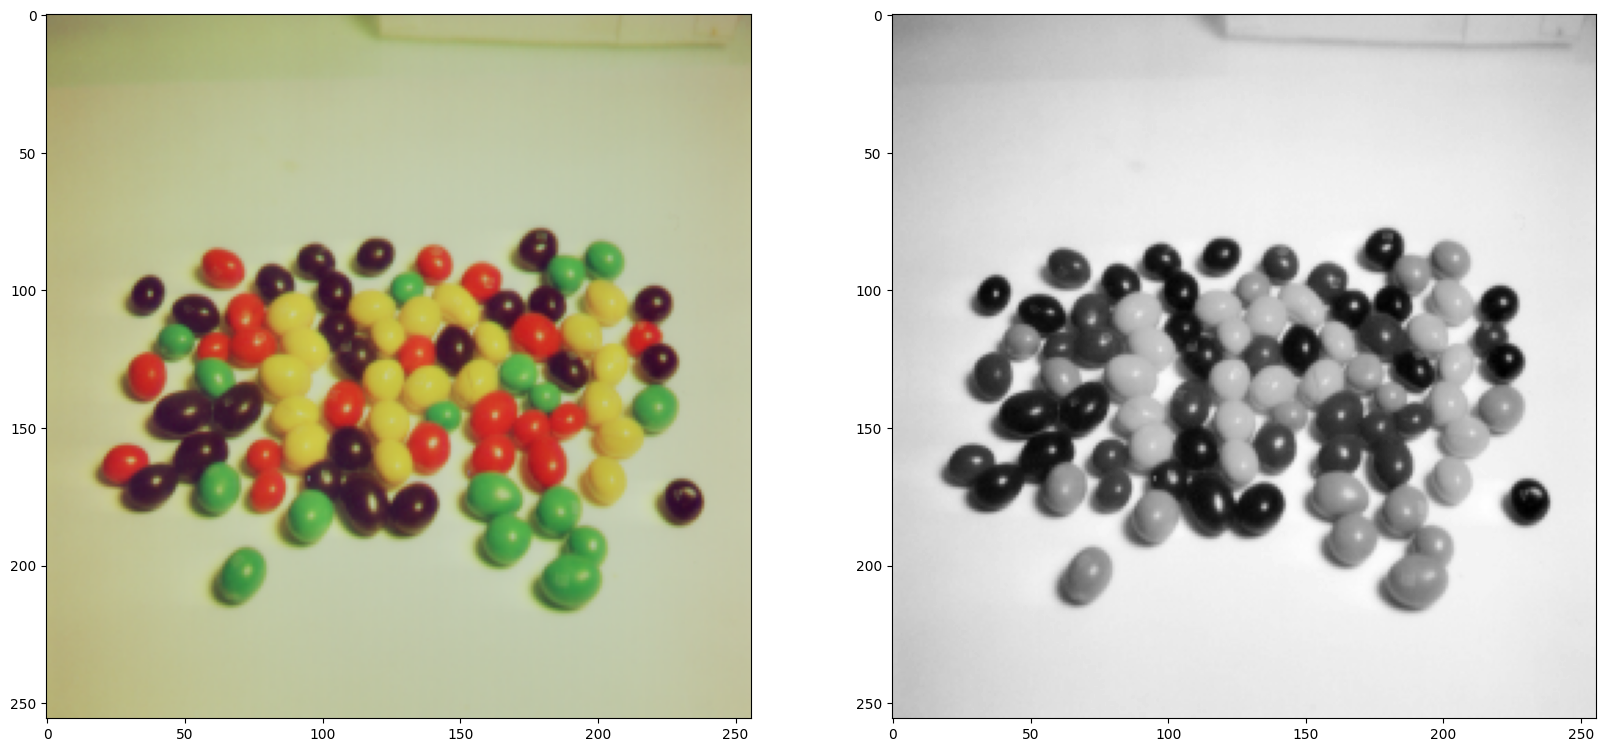

In [21]:
img = cv2.imread('./imgs/4.1.08.tiff')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(img)
ax[1].imshow(gray, cmap="gray")
plt.show()

In [22]:
def mean_filter(img, kernel):
    img = img.copy()
    kernelSize = kernel.shape[0]
    for i in range(kernelSize//2, img.shape[0]-kernelSize//2):
        for j in range(kernelSize//2, img.shape[1]-kernelSize//2):
            img[i, j] = np.mean(img[i-kernelSize//2:i+kernelSize//2+1, j-kernelSize//2:j+kernelSize//2+1])
    return img

def median_filter(img, kernel):
    img = img.copy()
    kernelSize = kernel.shape[0]
    for i in range(kernelSize//2, img.shape[0]-kernelSize//2):
        for j in range(kernelSize//2, img.shape[1]-kernelSize//2):
            img[i, j] = np.median(img[i-kernelSize//2:i+kernelSize//2+1, j-kernelSize//2:j+kernelSize//2+1])
    return img

def gaussian_filter(img, kernel):
    img = img.copy()
    kernelSize = kernel.shape[0]
    for i in range(kernelSize//2, img.shape[0]-kernelSize//2):
        for j in range(kernelSize//2, img.shape[1]-kernelSize//2):
            img[i, j] = np.sum(img[i-kernelSize//2:i+kernelSize//2+1, j-kernelSize//2:j+kernelSize//2+1] * kernel)
    return img

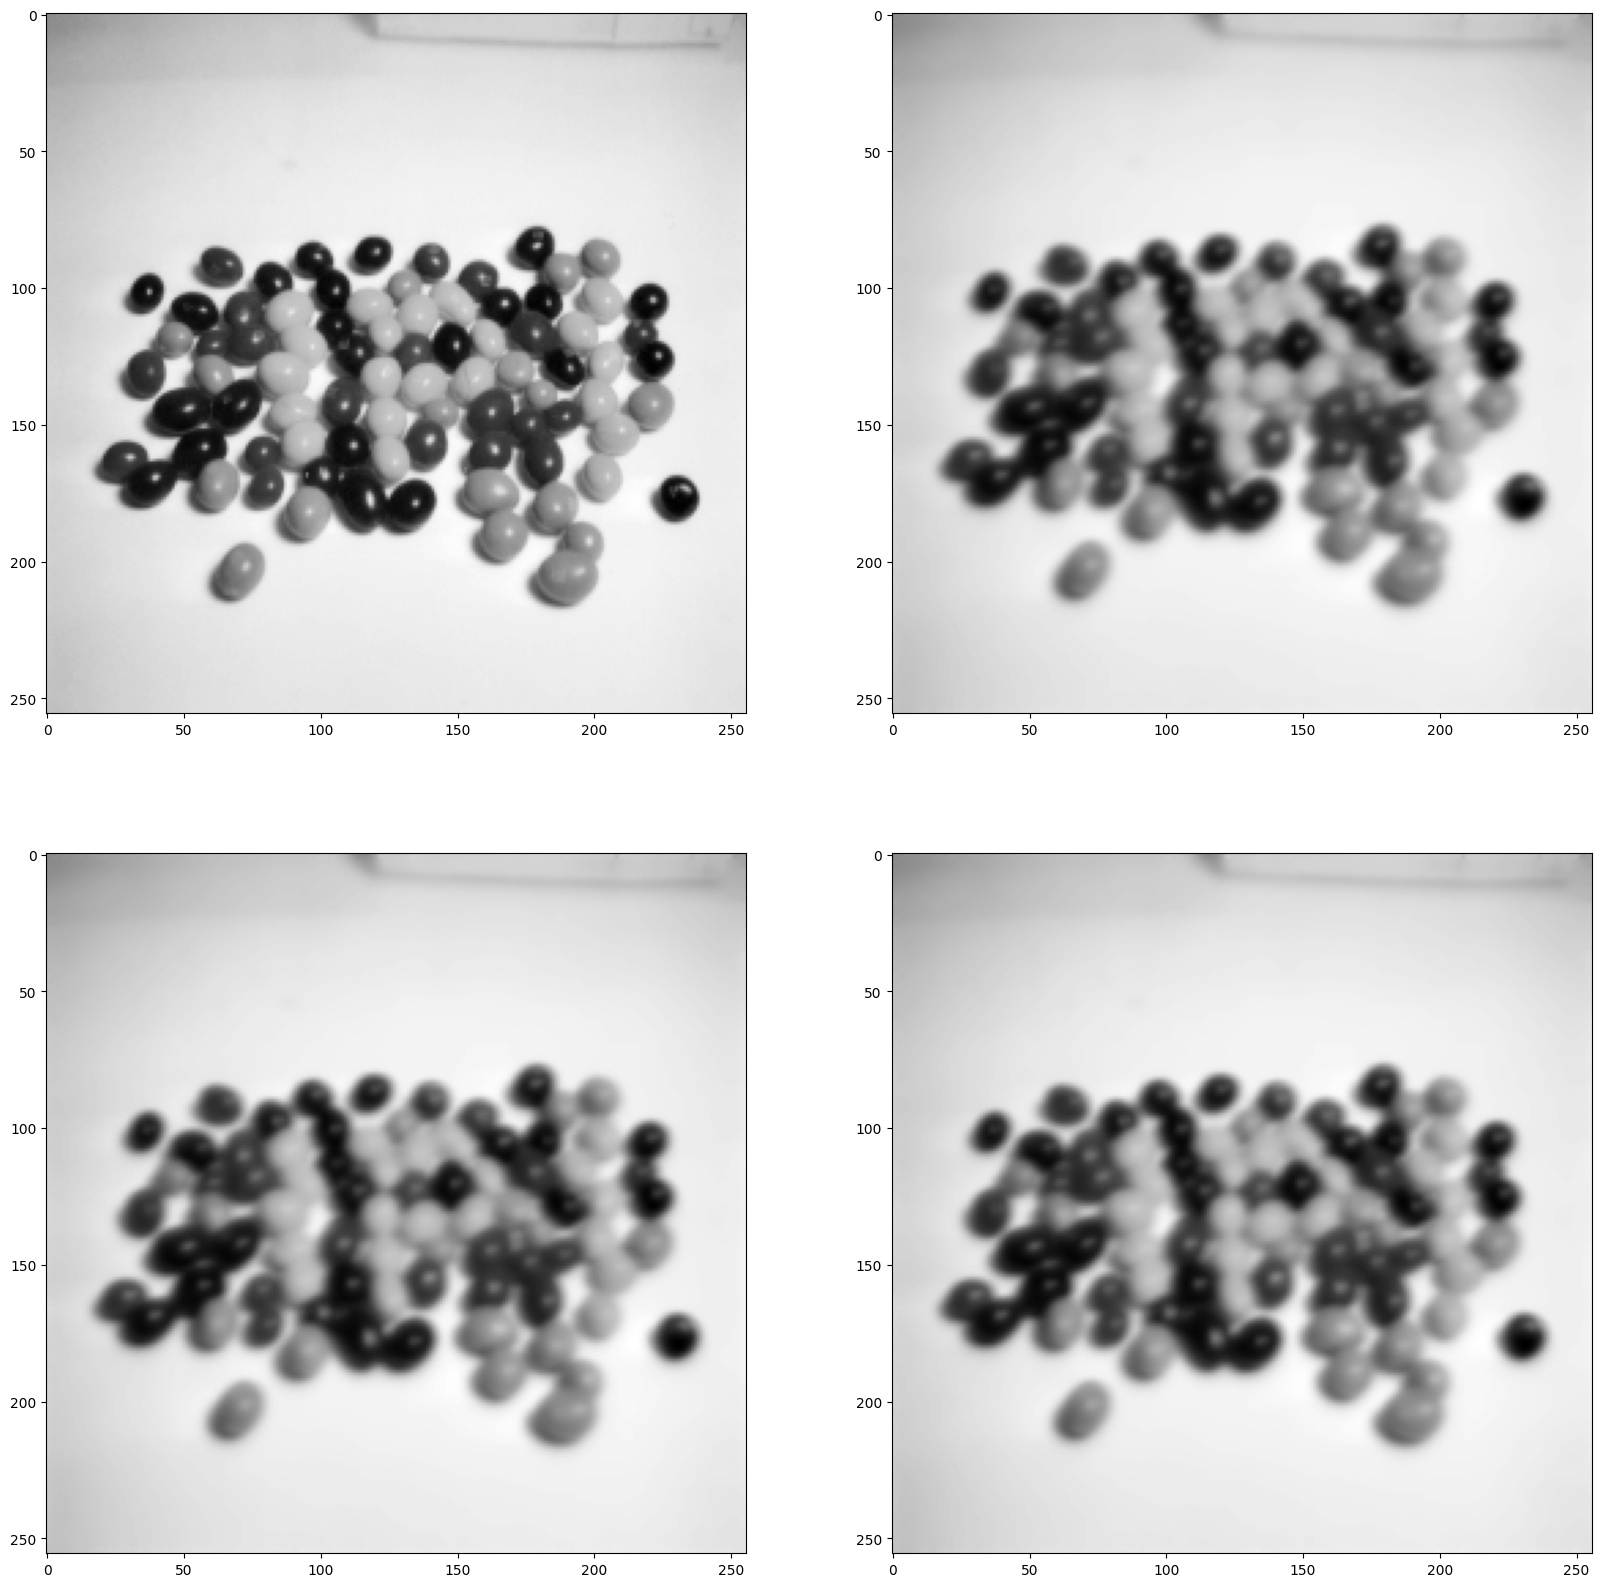

In [23]:
kernelA = np.ones((5, 5), np.uint8)
kernelB = np.array([[1, 4, 7, 4, 1],
                    [4, 16, 26, 16, 4],
                    [7, 26, 41, 26, 7],
                    [4, 16, 26, 16, 4],
                    [1, 4, 7, 4, 1]]) / 273.0

kernelC = np.array([[1, 2, 3, 2, 1],
                    [2, 4, 6, 4, 2],
                    [3, 6, 9, 6, 3],
                    [2, 4, 6, 4, 2],
                    [1, 2, 3, 2, 1]]) / 52.0

imgA = mean_filter(gray, kernelA)
imgB = mean_filter(gray, kernelB)
imgC = mean_filter(gray, kernelC)

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0,0].imshow(gray, cmap="gray")
ax[0,1].imshow(imgA, cmap="gray")
ax[1,0].imshow(imgB, cmap="gray")
ax[1,1].imshow(imgC, cmap="gray")
plt.show()

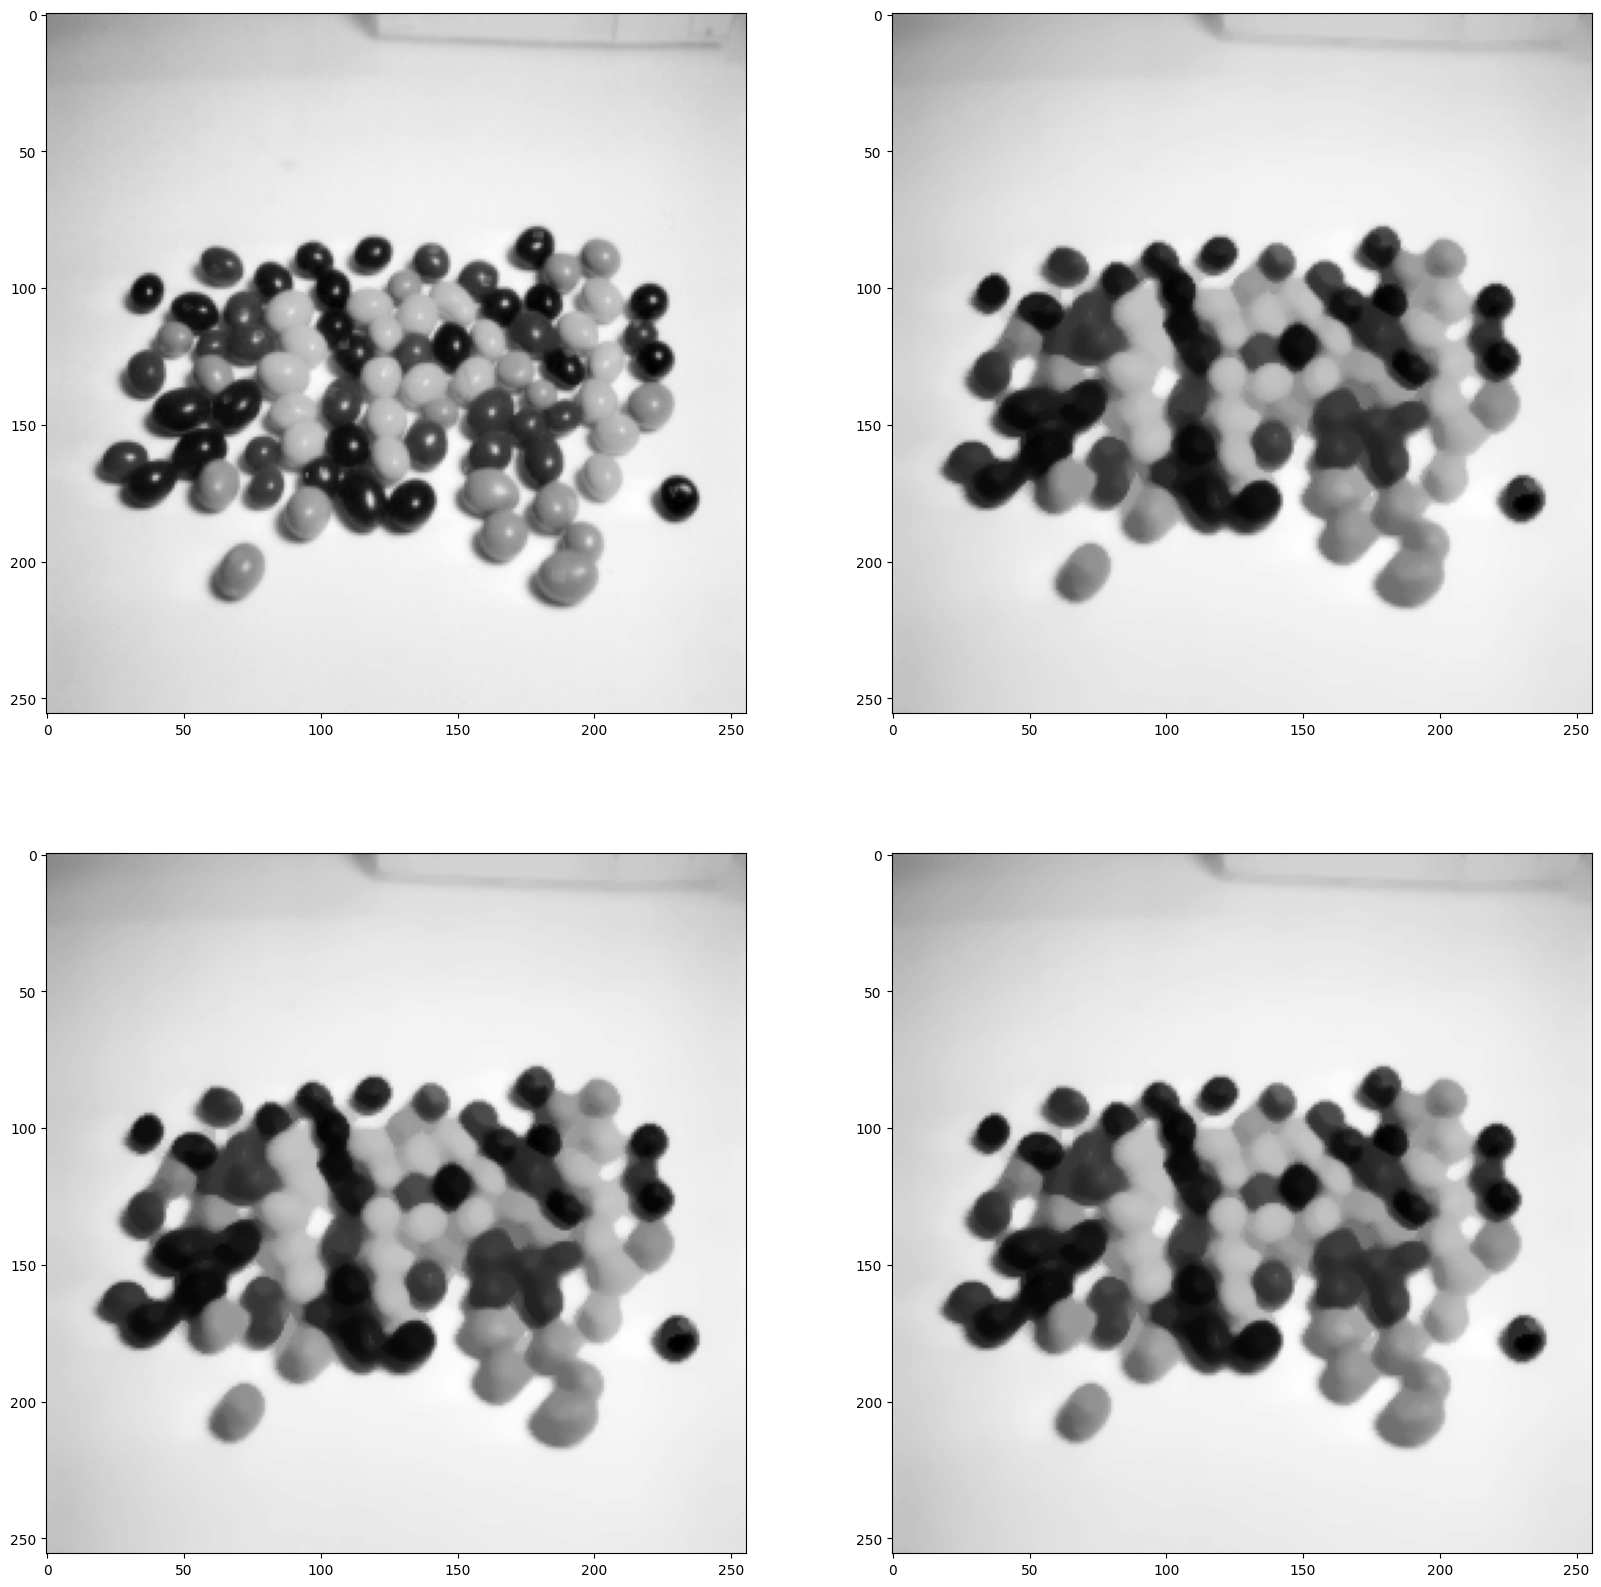

In [24]:
kernelA = np.ones((5, 5), np.uint8)
kernelB = np.array([[1, 4, 7, 4, 1],
                    [4, 16, 26, 16, 4],
                    [7, 26, 41, 26, 7],
                    [4, 16, 26, 16, 4],
                    [1, 4, 7, 4, 1]]) / 273.0

kernelC = np.array([[1, 2, 3, 2, 1],
                    [2, 4, 6, 4, 2],
                    [3, 6, 9, 6, 3],
                    [2, 4, 6, 4, 2],
                    [1, 2, 3, 2, 1]]) / 52.0

imgA = median_filter(gray, kernelA)
imgB = median_filter(gray, kernelB)
imgC = median_filter(gray, kernelC)

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0,0].imshow(gray, cmap="gray")
ax[0,1].imshow(imgA, cmap="gray")
ax[1,0].imshow(imgB, cmap="gray")
ax[1,1].imshow(imgC, cmap="gray")
plt.show()

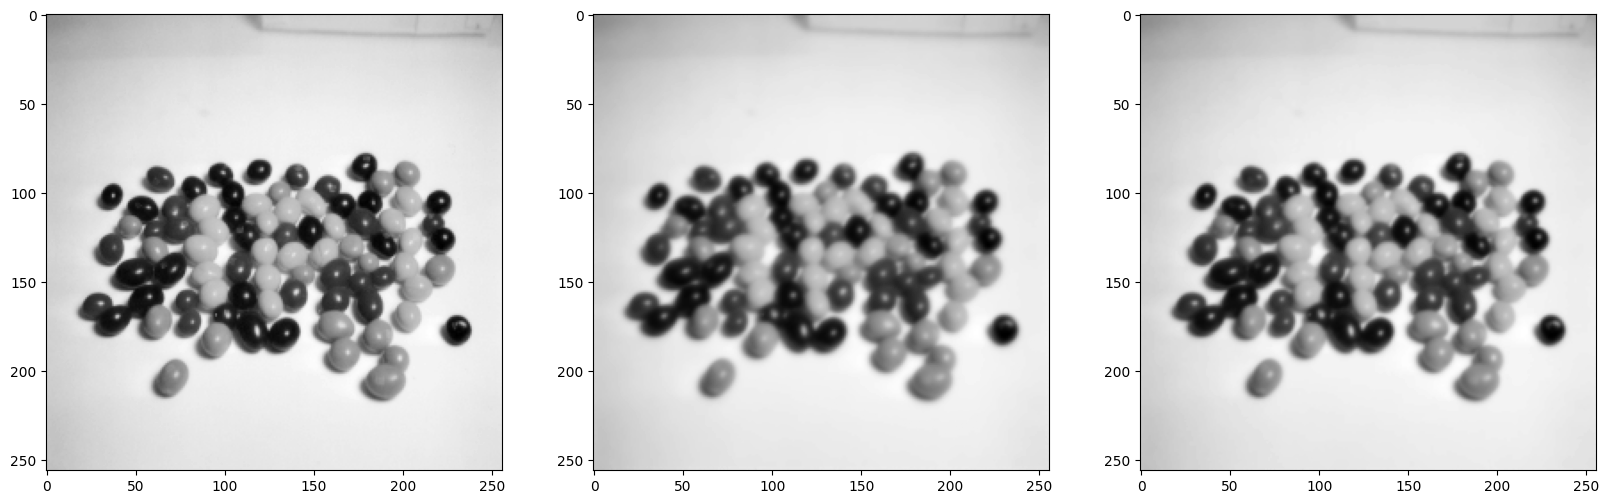

In [25]:
kernelG1 = np.array([[1, 4, 7, 4, 1],
                    [4, 16, 26, 16, 4],
                    [7, 26, 41, 26, 7],
                    [4, 16, 26, 16, 4],
                    [1, 4, 7, 4, 1]]) / 273.0
kernelG2 = np.array([[1, 2, 1],
                    [2, 4, 2],
                    [1, 2, 1]]) / 16.0

imgA = gaussian_filter(gray, kernelG1)
imgB = gaussian_filter(gray, kernelG2)
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
ax[0].imshow(gray, cmap="gray")
ax[1].imshow(imgA, cmap="gray")
ax[2].imshow(imgB, cmap="gray")
plt.show()